# Classifier 5: Support Vector Machine (SVM) with nonlinear (polynomail, RBF) kernel

* Mapping data in a higher dimensional feature space to categorize data
* Maximizes predictive accuracy without going overfitting
* Uses Non-linear kernel

In [1]:
# Classifier: SVC with nonlinear (RBF kernel) kernel(e2)

# 6.e2.1 Modelling - Implementing Model

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification using support vector classifier with polynomial kernel
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
rbf_svc_clf = SVC(kernel="rbf")

# Fit the clasifier model
rbf_svc_clf.fit(X_train, y_train)

# make predictions from model
y_pred=rbf_svc_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
# 6.e2.2 Modelling - model analysis

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# As high as 83.8%

print(classification_report(y_test,y_pred))

# Hard to get feature importance when svc uses non-linear kernel since the dataset is mapped to higher dimension, and the hyperplane is determine in that dimension.

Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       122
           1       0.73      0.75      0.74        57

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [15]:
# 6.e2.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features (determined above)
# new_train = processed_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = processed_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

new_train = processed_train.drop(['Alone','Parch','Embarked', 'Pclass','Cabin'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'Pclass','Cabin'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)

# fit the classifier for tuning hyperparameter
rbf_svc_clf = SVC(kernel="rbf")

# Grid search CV (cross validation) to find the best hyperparameters for tuning
rbf_svc_param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'tol': [1e-4, 1e-3, 1e-2, 0.1],
    'gamma': [0.0001, 0.001, 0.01, 0.1]
}

# Perform Hyperparameter Tuning
rbf_svc_ran_search = RandomizedSearchCV(rbf_svc_clf, rbf_svc_param_grid, cv=5)
rbf_svc_ran_search.fit(X_train, y_train)
# print(pd.DataFrame(rbf_svc_grid_search.cv_results_))

# print(rbf_svc_grid_search.best_params)
print(rbf_svc_ran_search.best_estimator_)
# print(rbf_svc_grid_search.best_score_)
# print(rbf_svc_grid_search.best_params_)

# Fit the tuned model
tuned_rbf_svc_clf=rbf_svc_ran_search.best_estimator_
tuned_rbf_svc_clf.fit(X_train, y_train)


# Tuned model make predictions on test
y_pred = tuned_rbf_svc_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

SVC(C=0.05, gamma=0.01, tol=0.1)


Tuned Accuracy: 0.5754189944134078
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       103
           1       0.00      0.00      0.00        76

    accuracy                           0.58       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.33      0.58      0.42       179



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Your submission was successfully saved!


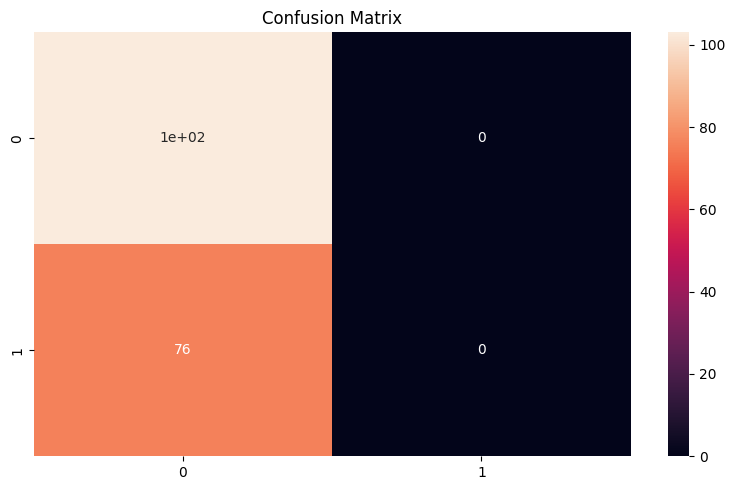

In [16]:
# 6.e2.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_rbf_svc_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

# Assign output to a csv file
# output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of Nonlinear SVM

## For SVC with polynomial kernel
* Highest regular accuracy and tuned accuracy 
* Value of C fluctuates when tuning
* Kaggle accuracy has little to no variance, always the same

* Kaggle accuracy: 0.77751, 0.75837, 0.77272(t), 0.77272(t), 0.77511(t), 0.77511

## For SVC with RBF kernel
* 0.76555, 0.622(!), 0.76555, 0.76555, 0.76555
* Strong evidence of overfitting

## Advantages:  
* Better in higher dimension

## Disadvantages:  
* Easier to overfit than linear SVM

## Linear vs Nonlinear SVM 
* Linear uses a single line to separate data, nonlinear uses a decision boundary (nonlinear shape)